## Binary classification: demo

In [1]:
# 
import numpy as np
import random
# plot|
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
# datasets
from sklearn.datasets import make_blobs
# ML classifiers
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector

#### Create the dataset

In [2]:
# X: features
# y: labels in {0, 1}
DIM = 20      # number iof features (dimension)
CLASSES = 4   # number of classes
N = 1000      #number of samples
X, y = make_blobs(n_samples = N, centers = CLASSES, n_features = DIM, cluster_std=3)

In [3]:
np.unique(y)

array([0, 1, 2, 3])

In [4]:
np.max(X, axis=0)

array([16.11369007, 17.38256606, 17.61759136,  4.94963433, 16.74471744,
       14.64294609, 11.46960279, 18.50787008, 12.17335379, 15.42917387,
       16.14994651,  8.21737607, 14.85875098, 17.41682545, 17.64351354,
        9.70093181, 15.10035692, 17.41744296, 16.54457137, 19.57290743])

In [5]:
# let change the scale of some features
X[:,2] = X[:,2]*1000
X[:,4] = X[:,4]*10000
X[:,15] = X[:,15]*100

In [10]:
y

array([2, 2, 0, 0, 0, 1, 0, 2, 1, 2, 3, 1, 3, 2, 3, 2, 3, 1, 3, 3, 3, 1,
       1, 0, 3, 0, 1, 1, 3, 3, 0, 0, 3, 3, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       2, 0, 3, 2, 3, 0, 0, 1, 1, 3, 0, 0, 2, 0, 1, 0, 3, 0, 2, 3, 1, 2,
       3, 2, 2, 1, 3, 3, 1, 3, 2, 1, 0, 2, 0, 1, 2, 2, 0, 3, 1, 1, 2, 0,
       3, 0, 2, 0, 3, 0, 0, 2, 2, 2, 3, 1, 0, 0, 1, 3, 1, 2, 1, 2, 0, 0,
       2, 1, 0, 0, 2, 3, 0, 3, 1, 3, 3, 0, 3, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       2, 3, 2, 1, 1, 3, 3, 1, 3, 2, 0, 3, 1, 0, 2, 1, 3, 0, 3, 3, 3, 1,
       2, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 3, 0, 3, 3, 2, 2, 1, 1, 2, 2, 0,
       3, 0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 3, 3, 3, 1, 1, 2, 2,
       0, 3, 2, 3, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 1,
       0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 3, 0, 0, 3, 3, 0, 1, 1, 3, 3, 3, 1,
       2, 0, 1, 0, 0, 1, 2, 0, 1, 3, 0, 3, 0, 0, 2, 3, 3, 3, 3, 1, 1, 1,
       0, 2, 1, 3, 2, 2, 1, 1, 1, 0, 2, 2, 1, 3, 0, 0, 1, 2, 3, 0, 1, 3,
       3, 2, 2, 2, 3, 0, 3, 1, 1, 0, 2, 3, 0, 3, 0,

#### Plot

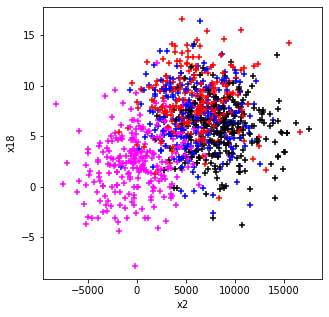

In [6]:
# set the size of the figure
plt.figure(figsize=(5,5))
# plot the scatter of the sample with the feature 0 and 1
colors = ListedColormap(['blue', 'red', 'black', 'magenta'])
f1, f2 = 2,18
plt.scatter(x=X[:,f1], y=X[:,f2], c = y, marker='+', cmap=colors)
plt.xlabel('x'+str(f1))
plt.ylabel('x'+str(f2))
plt.show()

### Display the scale of the features

In [216]:
# use pandas facilities
# compose the dataframe from (X,y )
feature_names = ['x'+str(i) for i in range(DIM)]
df = pd.DataFrame(data = X, columns = feature_names)
df['label'] =y
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
0,-6.840025,-0.567893,6709.388148,-9.472552,-60227.486698,-11.074724,-3.088719,-1.394860,0.909513,-10.608566,...,-3.012993,2.603505,-4.126483,1.676562,-899.244038,-1.292826,-4.861044,8.322465,-2.915666,3
1,5.030415,-8.104817,-4250.948109,1.625777,-5721.436915,-11.452595,-7.541498,-5.062160,6.425070,2.936731,...,-7.157410,-4.206114,-2.463999,9.547906,664.815038,-3.197649,3.317199,4.848395,-4.784664,2
2,3.030062,-5.158183,-933.351250,1.183003,-34241.404189,-6.548966,-4.619064,-2.206016,3.775592,8.603498,...,-6.959685,-1.219682,-4.780253,9.924528,194.701975,-6.463440,-0.004263,4.049895,-6.012320,2
3,-4.899141,-1.215524,8608.876683,-8.880988,-77433.370026,-7.112614,-1.736143,-4.140140,0.050063,1.316462,...,-4.423052,7.790605,-8.634677,-5.285915,-707.937202,3.018981,1.737176,3.618746,-13.950225,3
4,-7.000062,-6.020126,8420.021907,-8.820733,-41282.178987,-14.796566,1.312716,-0.170343,0.487874,-6.321453,...,4.706662,5.164275,-10.510979,-0.746425,-176.380662,-2.907483,-2.176680,7.074240,-3.673727,3


In [217]:
#description
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.446480,-3.258422,972.164443,2.683595,-15223.844321,-3.307760,-0.698090,1.167586,-0.287445,-1.319686,...,-2.735626,-0.240692,-5.374137,3.675314,24.358780,1.084296,3.546447,1.811112,-4.814180,1.500000
std,4.848252,3.821898,6014.096180,8.101386,46492.138392,7.153350,6.353717,6.219099,4.482543,7.948301,...,5.947110,7.226563,3.964847,5.222162,634.547476,4.667791,5.043209,6.853393,5.278691,1.118593
min,-14.148505,-14.903757,-10812.703141,-18.447797,-134363.352678,-17.005798,-16.321447,-13.348064,-12.251716,-17.723157,...,-15.939166,-17.822569,-17.014093,-7.924312,-1490.411043,-10.783135,-10.775471,-16.603713,-16.427949,0.000000
25%,-4.238572,-5.781788,-3451.648280,-3.010019,-48570.584249,-8.532087,-5.310980,-3.878949,-3.485504,-8.829510,...,-7.731201,-6.856448,-8.262544,-0.468164,-494.470697,-2.537098,-0.381673,-3.401689,-8.510613,0.750000
50%,-0.206050,-3.100466,-692.774311,5.136430,-23643.188750,-5.644529,-0.894733,0.529786,-0.034850,-1.340854,...,-2.922588,-0.257889,-5.631448,3.553629,-52.295104,1.010569,3.508942,3.443937,-5.891443,1.500000
75%,3.227986,-0.745846,4873.177847,9.007916,17838.612565,1.604637,3.644983,5.893293,2.778840,6.239338,...,2.259061,6.335427,-2.822518,7.813286,537.951245,4.632213,7.472954,6.937103,-1.221350,2.250000
max,13.328351,7.490518,21240.793243,18.777423,117789.412344,16.339945,16.955888,17.004956,12.756255,15.230422,...,11.568534,15.149617,5.356590,18.780347,1866.109336,14.947688,16.889006,16.908193,10.902549,3.000000


### Perform classification
1. Prepare datasets for training and test

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape, X_test.shape)

(700, 20) (300, 20)


2. Create the classifier and fit to the training dataset

In [232]:
clf = NearestCentroid()
clf.fit(X_train, y_train)

NearestCentroid()

3. Test it (evaluation): predict the label of the test samples

In [233]:
y_pred = clf.predict(X_test)

4. Compute the error rate

In [234]:
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy on the test set = {accuracy:.2f}")
                          

Accuracy on the test set = 0.66


### Try improving performance (accuracy) by feature scaling

In [235]:
# using MinMaxScaler
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)
# train and evaluate the classifier model using the scaled features
clf.fit(X_train_mm, y_train)
y_pred_mm = clf.predict(X_test_mm)
accuracy_mm = accuracy_score(y_pred_mm, y_test)
print(f"Accuracy on the test set = {accuracy_mm:.2f}")

Accuracy on the test set = 1.00


In [236]:
# using z-score scaler
scaler_z = StandardScaler()
X_train_z = scaler_z.fit_transform(X_train)
X_test_z = scaler_z.transform(X_test)
# train and evaluate the classifier model using the scaled features
clf.fit(X_train_z, y_train)
y_pred_z = clf.predict(X_test_z)
accuracy_z = accuracy_score(y_pred_z, y_test)
print(f"Accuracy on the test set = {accuracy_z:.2f}")

Accuracy on the test set = 1.00


In [237]:
y_tr_pred = clf.predict(X_train_z)
accuracy_tr = accuracy_score(y_tr_pred, y_train)
print(f"Accuracy on the train set = {accuracy_tr:.2f}")

Accuracy on the train set = 1.00


### Try improve performance by dimensionality reduction
1. Feature selection from the original dataset (without scaling)

In [252]:
# 1. create a model used to evaulated the quality fo the feature subsets selected
nn = KNeighborsClassifier(n_neighbors=1)
# create the feature selection model, fit it to train data and then apply it on the train and the test
sfs = SequentialFeatureSelector(nn, n_features_to_select=10, direction = 'forward') # direction=backward for SBS
sfs.fit(X_train, y_train)
X_train_reduced = sfs.transform(X_train)
X_test_reduced = sfs.transform(X_test)

In [250]:
sfs.support_

array([False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [253]:
# train and evaluate the model using the selected features
clf.fit(X_train_reduced, y_train)
y_pred_sfs = clf.predict(X_test_reduced)
accuracy_sfs = accuracy_score(y_pred_sfs, y_test)
print(f"Accuracy on the test set = {accuracy_sfs:.2f}")

Accuracy on the test set = 0.66


2. Feature selection from the scaled dataset

In [254]:
# work on scaled data, for example minmaxscaler
# 1. create a model used to evaulated the quality fo the feature subsets selected
nn = KNeighborsClassifier(n_neighbors=1)
# create the feature selection model, fit it to train data and then apply it on the train and the test
sfs = SequentialFeatureSelector(nn, n_features_to_select=5, direction = 'forward') # direction=backward for SBS
sfs.fit(X_train_mm, y_train)
X_train_reduced = sfs.transform(X_train_mm)
X_test_reduced = sfs.transform(X_test_mm)


In [255]:
# train and evaluate the model using the selected features
clf.fit(X_train_reduced, y_train)
y_pred_sfs = clf.predict(X_test_reduced)
accuracy_sfs = accuracy_score(y_pred_sfs, y_test)
print(f"Accuracy on the test set = {accuracy_sfs:.2f}")

Accuracy on the test set = 1.00


In [ ]:
X_train_reduced

In [ ]:
X_test_mm

In [ ]:
sfs.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True])